In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [34]:
df=pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [68]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [69]:
df['salary'].fillna(df['salary'].mean()) #filling  the null values in salary with mean

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

In [70]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [71]:
data=pd.get_dummies(df['gender']) #creating dummies of gender column to get separate column for males and females

In [72]:
df_N=df.join(data)

In [73]:
df_N

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,F,M
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,0,1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,1,0


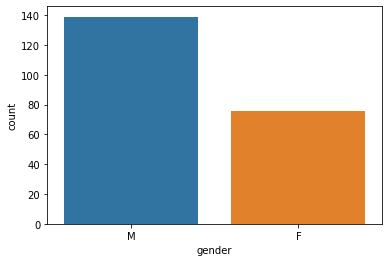

In [74]:
import seaborn as sns
sns.countplot(df_N['gender'])

The above graph shows that number of males is more then the number of females

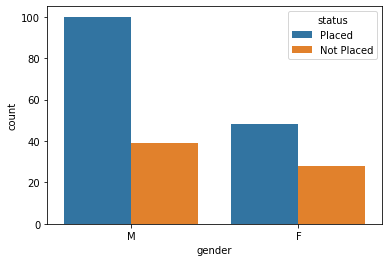

In [75]:
sns.countplot(x=df_N['gender'],hue=df_N['status'])

The above graph shows that number of males getting placed is more then the number of females getting placed

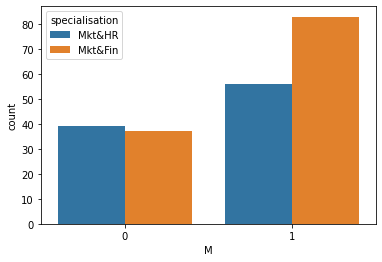

In [76]:

sns.countplot(x=df_N['M'],hue=df_N['specialisation'])

The analysis shows that the number of males in mkt and HR is more than those in Mkt and Fin and the number of females in these courses is similar in number

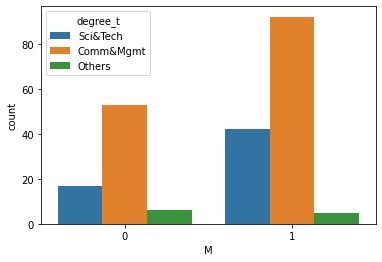

In [77]:
sns.countplot(x=df_N['M'],hue=df_N['degree_t'])

1. The number of males and females in comm and mgmt is more than those in other branches

In [78]:
j=df_N.groupby('degree_p')['M'].sum().reset_index()

In [79]:
j[j['M']>0].mean()

degree_p    65.965385
M            2.138462
dtype: float64

The average percentage for males in degree is 65.96

In [80]:
f=df_N.groupby('degree_p')['F'].sum().reset_index()
f[f['F']>0].mean()

degree_p    68.783111
F            1.688889
dtype: float64

The average percentage for females in degree is 68.78

In [81]:
df_N['degree_p'].describe()

count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

The max value in degree percentage is 91 and min vaue is 50

In [82]:
df_N['deg_p'] = pd.cut(x=df_N['degree_p'], bins=[50,55,60,65,70,75,80,85,90,95], labels=['50','55', '60', '65','70','75','80','85','90'])

The degree_p column is transformed into differnet bins with one bin representing all the values in the range of 5

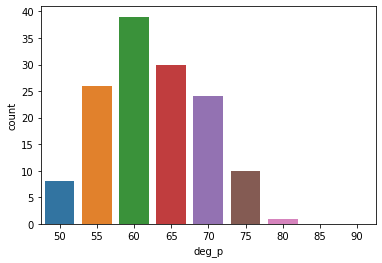

In [83]:
sns.countplot(df_N[df_N['M']==1]['deg_p'])

* The graph shows the amount of males having differnt percentages

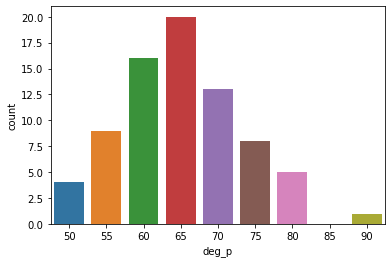

In [84]:
sns.countplot(df_N[df_N['F']==1]['deg_p'])

* The graph shows the amount of females having differnt percentages

In [85]:
df_N['mba_p'].describe()

count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

This shows the range of marks in mba ranging from 51.21 as the lowest and 77.89 as the highest

In [86]:
df_N['mb_p'] = pd.cut(x=df_N['mba_p'], bins=[50,55,60,65,70,75,80], labels=['50','55', '60', '65','70','75'])

The mba_p column is transformed into differnet bins with one bin representing all the values in the range of 5

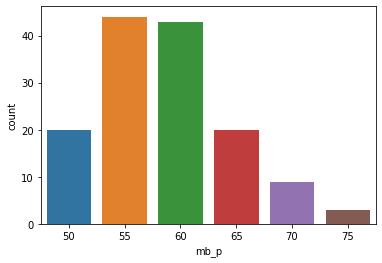

In [87]:
sns.countplot(df_N[df_N['M']==1]['mb_p'])

this clearly depicts the number of males scoring arond 50-55 and 55-60 are in equal amount and most males are in this range

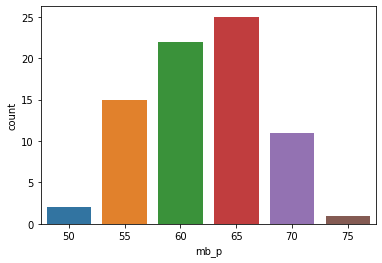

In [88]:
sns.countplot(df_N[df_N['F']==1]['mb_p'])

It shows that the number of females scoring around 60-65 are maximum


In [89]:
fj=df_N.groupby('mb_p')['M'].sum().reset_index()
s=0
su=0
for i,j in zip(fj['M'].astype(int),fj['mb_p'].astype(int)):
    s=s+i*j
    su=su+i

In [90]:
print(s/su)
    

58.669064748201436


The average percentage for males in mba is 58.66

In [91]:
fj=df_N.groupby('mb_p')['F'].sum().reset_index()
s=0
su=0
for i,j in zip(fj['F'].astype(int),fj['mb_p'].astype(int)):
    s=s+i*j
    su=su+i
print(s/su)

62.03947368421053


The average percentage for females in mba is 62.04

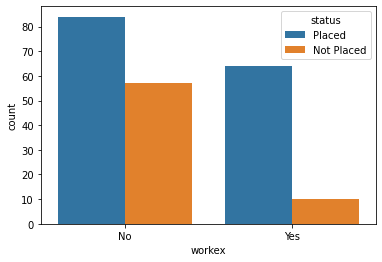

In [92]:
sns.countplot(x=df_N['workex'],hue=df_N['status'])

The workex matters and those with workex have better chance of getting placed

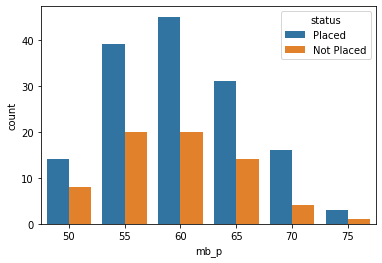

In [93]:
sns.countplot(x=df_N['mb_p'],hue=df_N['status'])

the number of people having score aroung 60 are getting placed in more numbers compared to people with higher or lower marks

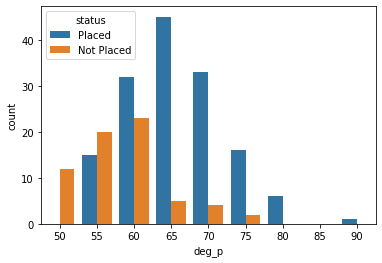

In [94]:
sns.countplot(x=df_N['deg_p'],hue=df_N['status'])

Similar trend as in mba, people with marks around 60 in degree are geting placed in more numbers

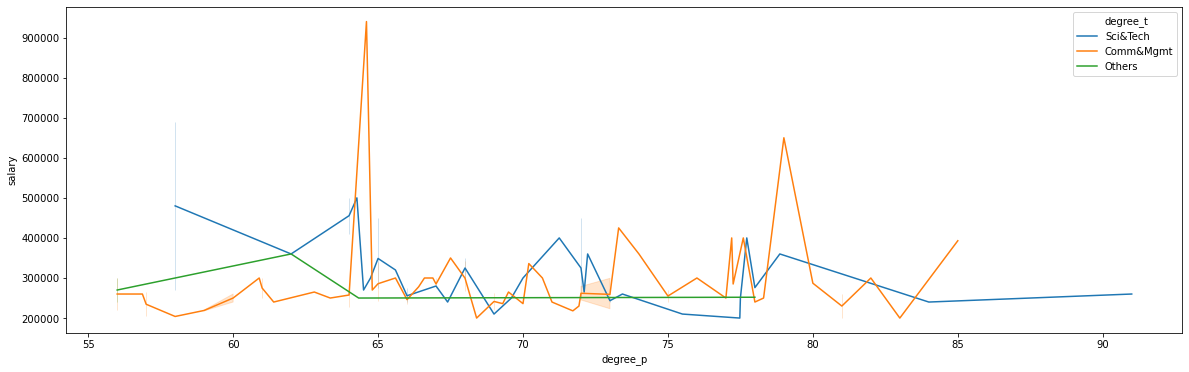

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.lineplot(df_N['degree_p'],df_N['salary'],hue=df_N['degree_t'])

Graph plotted between degree percentage , salary and stream we come to a conclusion people in comm and mgt  stream have ended uo with higher salary

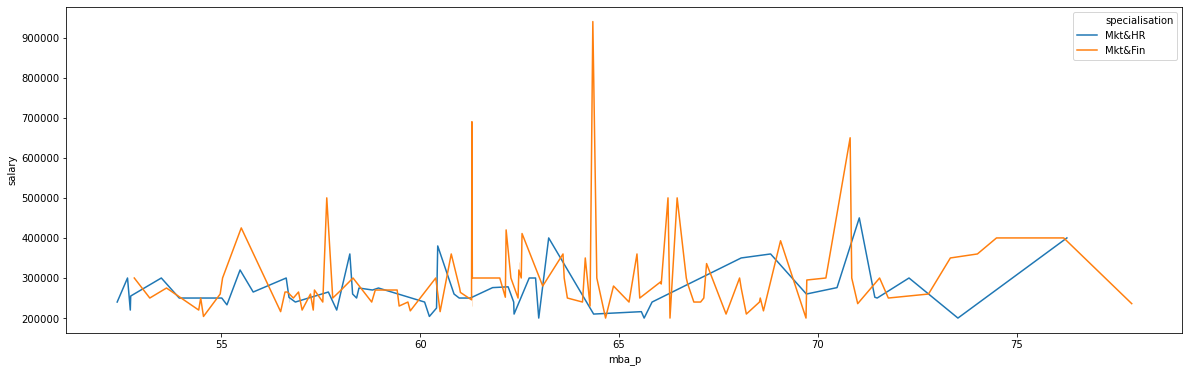

In [96]:

plt.figure(figsize=(20,6))
sns.lineplot(df_N['mba_p'],df_N['salary'],hue=df_N['specialisation'])

The graph plotted betweem mba percentage, salary and specialization we find that people with speacialization in mkt and fin have ended uo with higher salary

In [62]:
df_N.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,F,M,deg_p,mb_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,55,55
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,75,65
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,1,60,55
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1,50,55
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,70,55


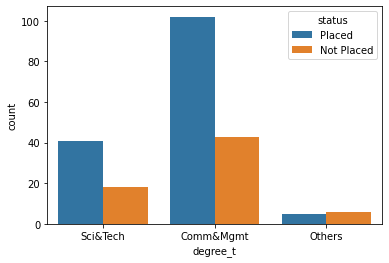

In [67]:
sns.countplot(df_N['degree_t'],hue=df_N['status'])

As we found in above graph as well people in comm and mgt stream are getting placed in more numbers